# Pandas

***Multivariate*** data are common in sciences. A meteorological example is a weather station that records temperature, humidity, wind speed, wind direction, precipitation, solar radiation, and measurement time. Tools that recognize the relationships between variables make analysis easier.

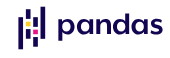

[Pandas](https://pandas.pydata.org/) is the dominant Python package for ***tabular*** (table) data. (Xarray will be used for multi-dimensional data.)  

### Pandas features

* Fast, efficient manipulation and indexing of tabular data
* Tools for reading and writing spreadsheet and database files: Excel, comma separated values (csv), text files, SQL, etc...
* Convenient time representation

### Pandas vs. spreadsheets

Spreadsheet programs (e.g. Excel) also work with tabular data. Spreadsheets are good for viewing data values and basic plotting, but have limited data analysis capabilities. Pandas enables larger and more complex analyses than spreadsheets.


In [ ]:
# Import pandas
import pandas as pd
# pd is the conventional alias for pandas

import numpy as np

# Temporary
try:
    import openpyxl
except ImportError:
    %conda install openpyxl

## Pandas data representation: `DataFrame` and `Series`

A `DataFrame` is the main datatype in pandas.

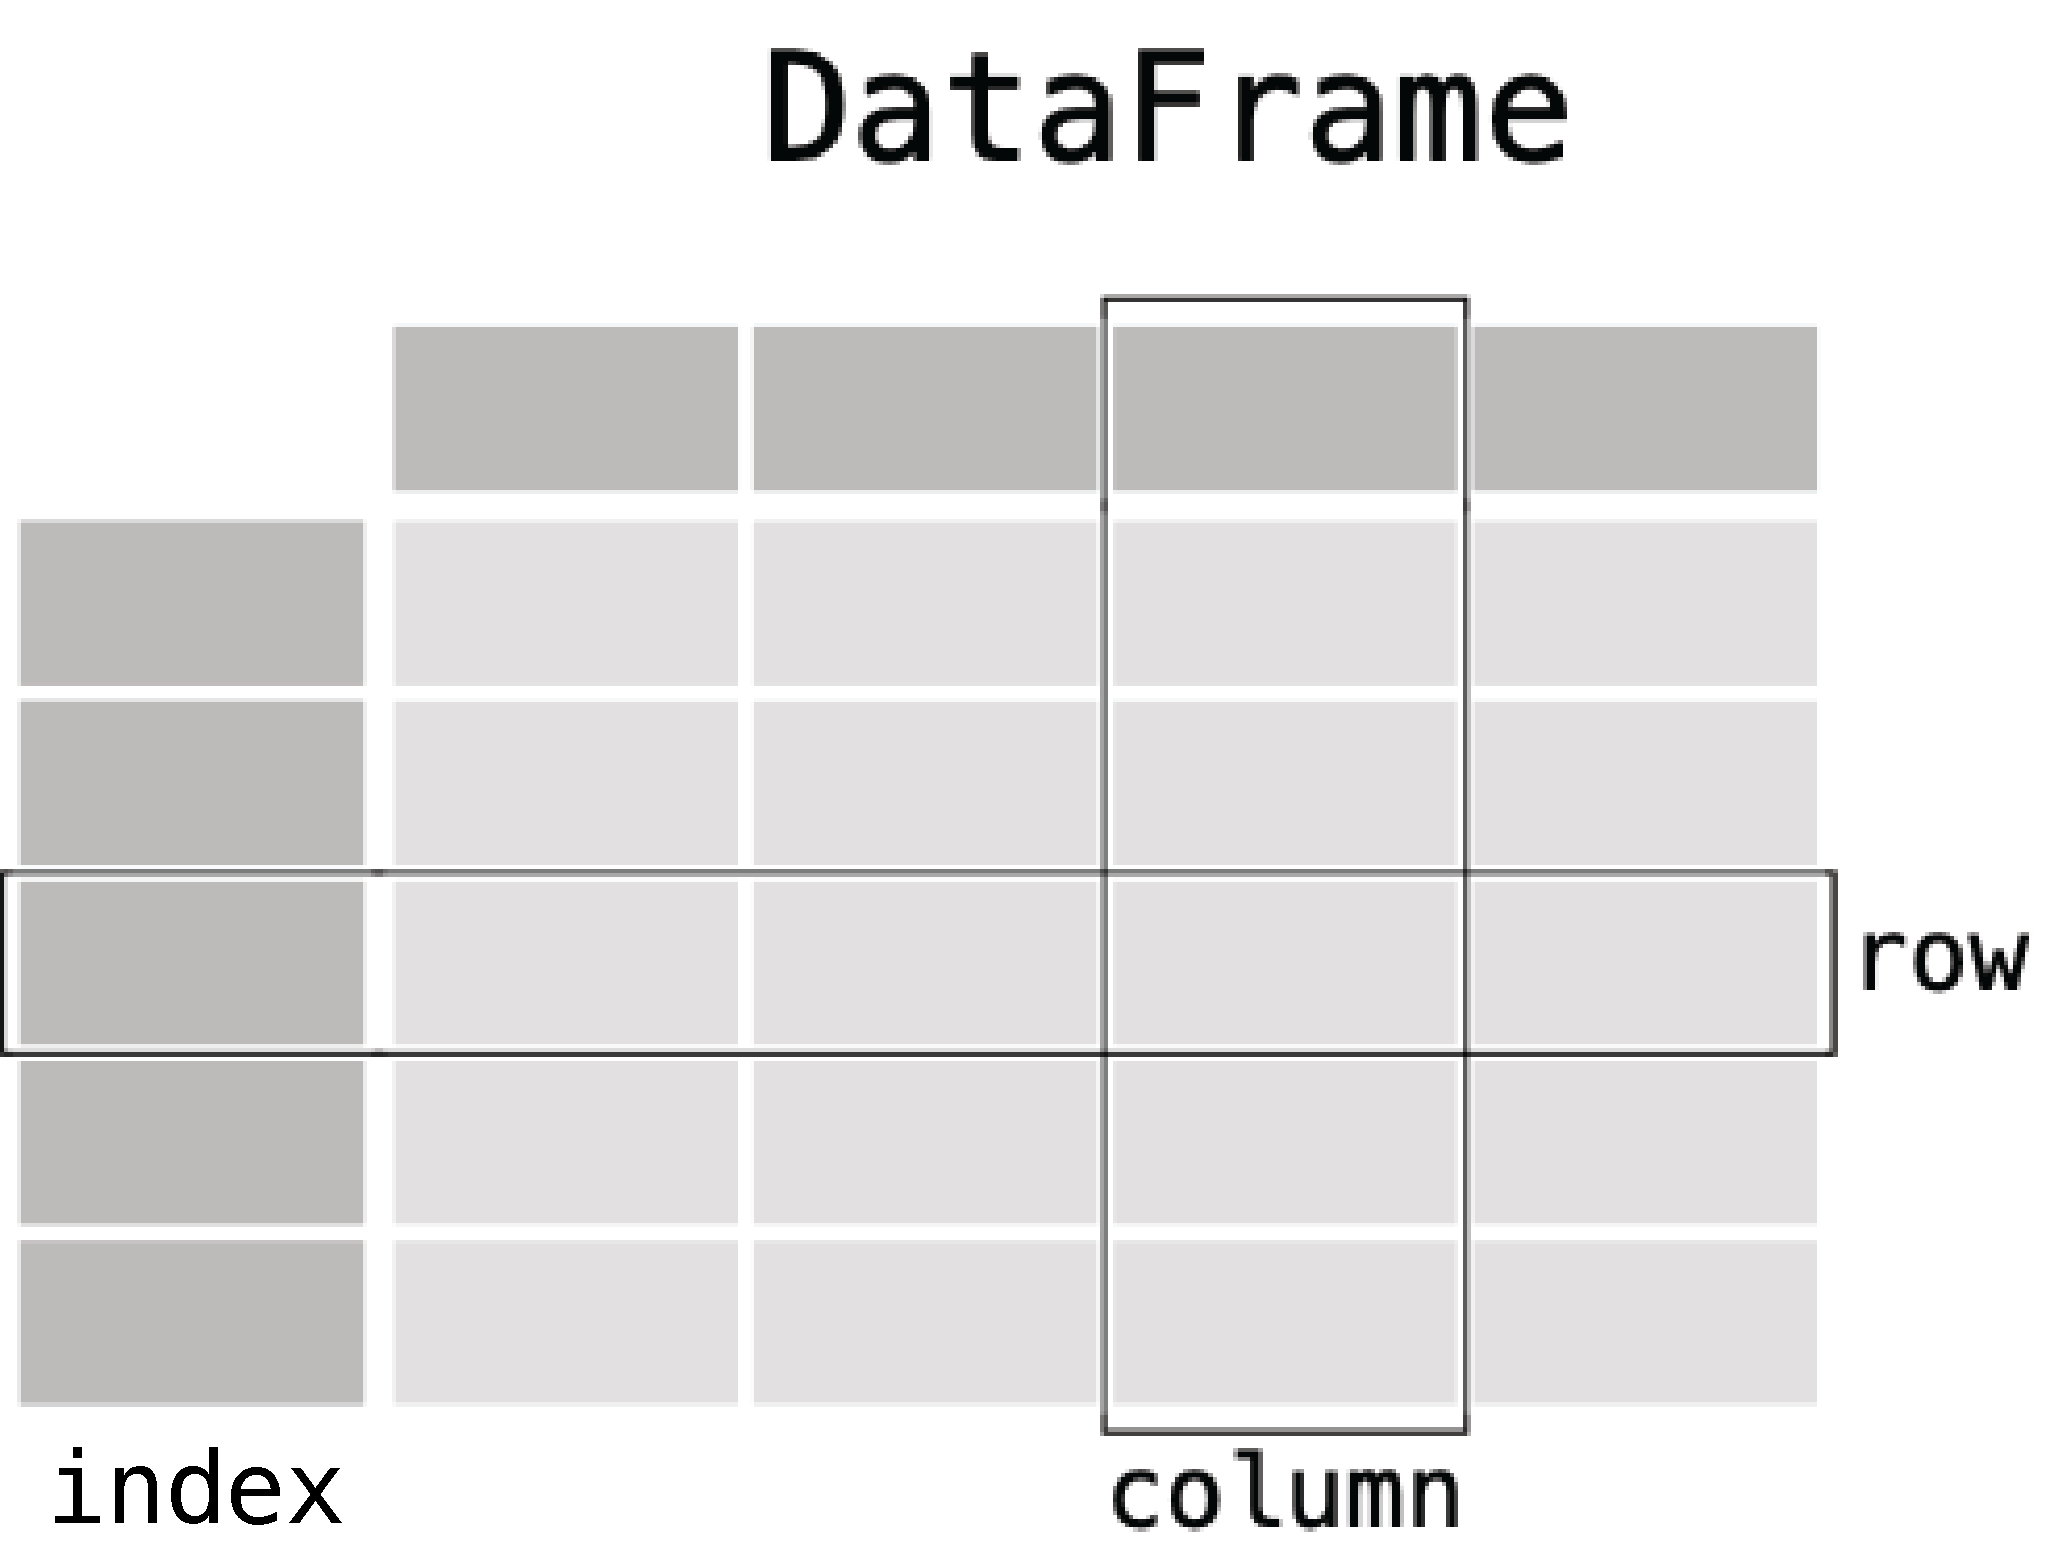

Within a column, all have the same data type (integer, float, string, boolean), but data types can vary between columns.


In [ ]:
# Manually create a DataFrame with Titanic passenger info (name, age, sex)
df = pd.DataFrame(
    # Converted from a dictionary of lists
    {
        "Name": [
            "Braund, Mr. Owen Harris",
            "Allen, Mr. William Henry",
            "Bonnell, Miss. Elizabeth",
        ],
        "Age": [22, 35, 58],
        "Sex": ["male", "male", "female"],
    }
)

In [ ]:
# Display DataFrame like a spreadsheet
df

Spreadsheet programs display information similarly.
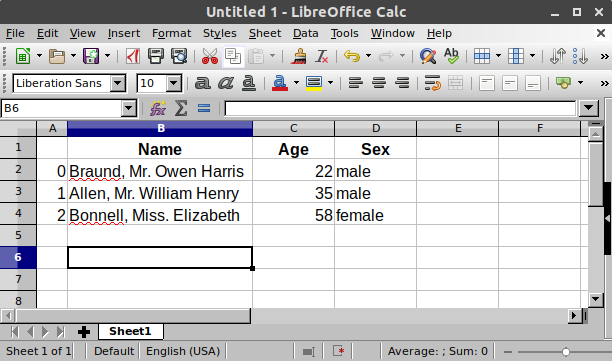

In [ ]:
# Column labels
df.columns

In [ ]:
# Index values
df.index

#### Each column in a `DataFrame` is a `Series`

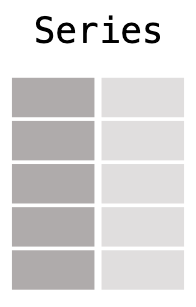

In [ ]:
# Access a single column of a DataFrame, just like keys in a dictionary
df['Age']

## Read and write tabular files

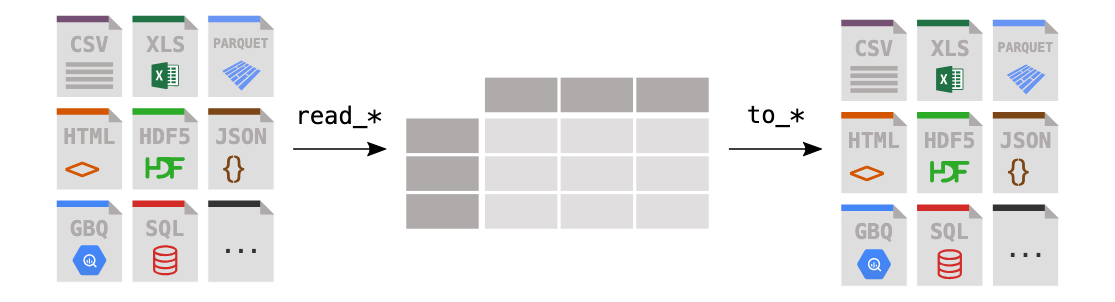


We will read a comma separated value (CSV) file containing many passengers of the Titanic.

In [ ]:
# Read comma separated values (csv)
titanic = pd.read_csv('datasets/titanic.csv')

In [ ]:
# Show the first 4 rows
titanic.head(4)

In [ ]:
# Last 4 rows
titanic.tail(4)

In [ ]:
# Technical summary of DataFrame: size, columns, data types, memory
titanic.info()

In [ ]:
# Basic statistical summary of numerical columns
titanic.describe()

In [ ]:
# Shape of the data (rows, columns)
titanic.shape

In [ ]:
# Save the DataFram as an excel file
titanic.to_excel("titanic.xlsx", sheet_name="passengers", index=False)

In [ ]:
# Read an Excel file
titanic = pd.read_excel("titanic.xlsx", sheet_name="passengers")

#### Exercise

Read the file 'datasets/NOAA-CRN-Millbrook-2017.txt' using `read_csv`.

1. Start with `pd.read_csv('datasets/NOAA-CRN-Millbrook-2017.txt')`
2. Inspect the result with `head()` and check if anything is wrong.
3. Consult [`read_csv` documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and make corrections. Use the `sep=`, `na_values=`, `parse_dates=` keywords.
4. Repeat steps 2 and 3.


<details>

```
df = pd.read_csv(filename)
    
df = pd.read_csv(filename, sep=r'/s+')

df = pd.read_csv(datafile, sep=r'\s+', 
            na_values=[-9999.0, -99.0])

df = pd.read_csv(datafile, sep=r'\s+', 
            na_values=[-9999.0, -99.0], 
            parse_dates=['LST_DATE'])
```

    
</details>

In [ ]:
filename = 'datasets/NOAA-CRN-Millbrook-2017.txt'
df = pd.read_csv(filename)

REMEMBER
* Getting data in to pandas from many different file formats or data sources is supported by `read_*` functions.
* Exporting data out of pandas is provided by different `to_*` methods.
* The `head`/`tail`/`info` methods and the `dtypes` attribute are convenient for a first check.

## Select columns from a `DataFrame`

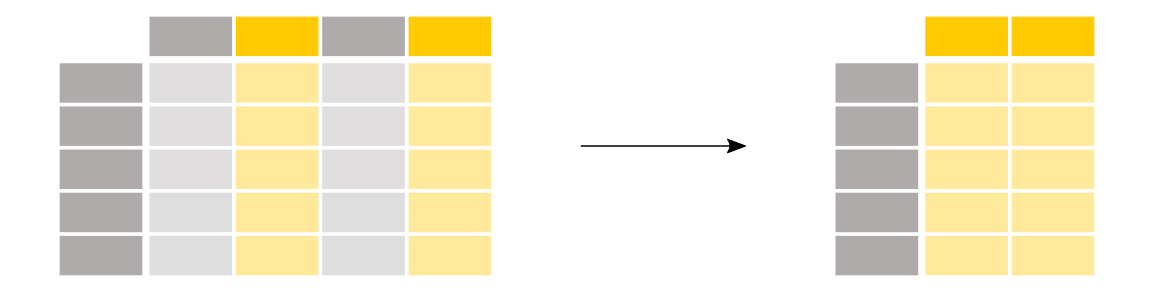

In [ ]:
# Select a single column with []
ages = titanic["Age"]

In [ ]:
# A single column is a Series
type(ages)

In [ ]:
# A single column has the shape of a 1D array
ages.shape

In [ ]:
# select two or more columns with a list of column names
age_sex = titanic[["Age", "Sex"]]

In [ ]:
# Two or more columns are a DataFrame
type(age_sex)

In [ ]:
# Two or more columns have the shape of a 2D array
age_sex.shape

## Select rows from a DataFrame

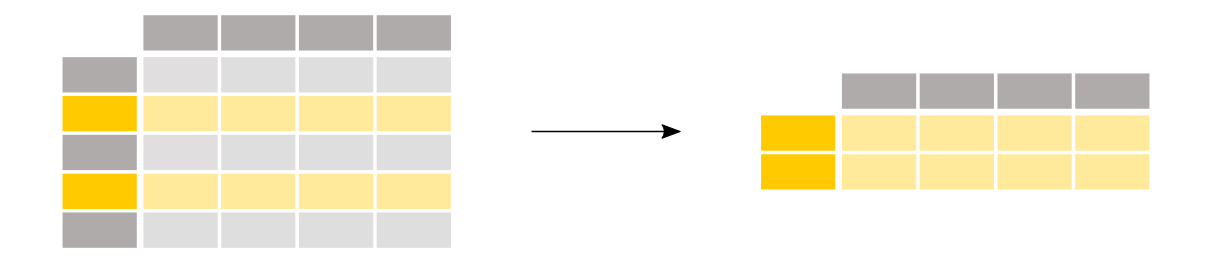


In [ ]:
# Select a single row by index value
titanic.loc[2]

In [ ]:
# Select a slice 
titanic.loc[2:5]

In [ ]:
# Select a rows by index location, which is the same as the index value in this example
titanic.iloc[2]

In [ ]:
# Select rows using a boolean array
titanic.loc[ titanic['Age'] > 35 ]

In [ ]:
# Select rows using a boolean array: two criteria
titanic.loc[ (titanic['Age'] > 35) & (titanic['Sex']=='female') ]

In [ ]:
# Some boolean selectors
# 2nd or 3rd class tickets
titanic['Pclass'].isin([2,3])

In [ ]:
# Passengers with complete age data (not NA)
titanic['Age'].notna()

#### Exercise

1. Create a `DataFrame` with only male passengers and another with only female passengers.
2. Use the `describe()` method to compare the mean survival rates of these two groups.

In [ ]:
# Write your code here

#### Exercise 

Use the same methods as the prior exercise to compare the survival rates of children (Age < 18) in 3rd class versus those in 1st class. You need to select rows that meet *two* criteria.

In [ ]:
# Write your code here

## Select rows *and* columns from a DataFrame

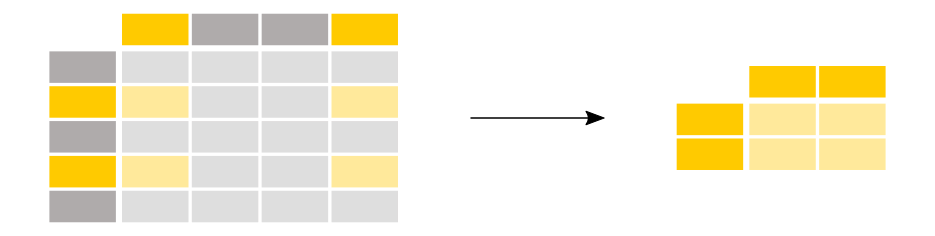

The methods for selecting rows and columns can be combined simulaneously

In [ ]:
# Two columns (survived, passenger class) for passengers > 35 years
titanic.loc[ titanic['Age']>35, ['Survived','Pclass'] ]

## More indexing and selecting

[Pandas Indexing Documentation](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-basics)


* When selecting subsets of data, square brackets `[]` are used.
* Inside these brackets, you can use a single column/row label, a list of column/row labels, a slice of labels, a conditional expression or a colon.
* Select specific rows and/or columns using `loc` when using the row and column names.
* Select specific rows and/or columns using `iloc` when using the positions in the table.
* You can assign new values to a selection based on `loc`/`iloc`.



## Plotting with pandas

These examples use air quality measurements of NO<sub>2</sub> collected at sites in London, Paris, and Antwerp. 

In [ ]:
import matplotlib.pyplot as plt

# Read the air quality data
aq = pd.read_csv("datasets/air_quality_no2.csv", 
                 index_col='datetime', 
                 parse_dates=['datetime'] )
# Index is from 'datetime', rather than integers 0, 1, 2, etc.

aq.head()

In [ ]:
# Quick plot
# By default, pandas shows one line for each column with numeric data
aq.plot()

In [ ]:
# Plot of just Paris
# We could also subset the DataFrame in any other way introduced above
aq["station_paris"].plot()

In [ ]:
# We could create the same plot with Matplotlib, 
# but that is more verbose
plt.plot( aq.index, 
          aq['station_paris'] )


In [ ]:
# Compare the values measured in London vs. Paris
aq.plot.scatter(x="station_london", 
                y="station_paris", 
                alpha=0.5)

Pandas supports many other plot types using `DataFrame.plot.[PLOTTYPE]()`:
'area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter'

For an introduction to plots other than the default line plot, see the user guide section about [supported plot styles](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-other).
 

In many development environments as well as IPython and Jupyter Notebook, use the TAB button to get an overview of the available methods, for example `aq.plot.` + TAB.

In [ ]:
# Press TAB for autocomplete options
aq.plot.

In [ ]:
# Create a boxplot
aq.plot.box()

In [ ]:
# We can combine the Matplotlib and Pandas plotting

# Create a figure with two panels
fig, axs = plt.subplots( ncols=2, figsize=(10,5) )

# Plot the time series in the left panel
aq.plot( ax=axs[0] )
axs[0].set_ylabel('NO2, ug/m3')
axs[0].set_xlabel('time')

# Plot scatter plot on right axis
aq.plot.scatter( x='station_london', 
                 y='station_paris',
                 alpha=0.5,
                 ax=axs[1] )
axs[1].set_xlabel('London NO2, ug/m3')
axs[1].set_ylabel('Paris NO2, ug/m3')

#### Exercise

1. Create a line plot that shows *only* London and Paris (not Antwerp)
3. Label the y axis with 'NO2, ug/m3'.

Hint: Select the columns that you want before making your plot.

In [ ]:
# Write your code here

## Time Indices

Pandas awareness of dates and times is one of its strengths.

In [ ]:
# DatetimeIndex with daily frequency
time = pd.date_range(start='2015-06-15', 
                     end='2015-07-15', 
                     freq='D')
time

In [ ]:
# DatetimeIndex objects have many useful attributes: year, month, day, dayofyear, hour, minute, second
time.month

In [ ]:
time.dayofyear

In [ ]:
# Construct a Series with a DatetimeIndex
two_years = pd.date_range(start='2014-01-01', 
                          end='2016-01-01', 
                          freq='D')
timeseries = pd.Series( np.sin( two_years.dayofyear * 2*np.pi / 365),
                       index=two_years)
timeseries.plot()

In [ ]:
# Select a time range using slice notation
timeseries.loc['2015-01-01':'2015-07-01'].plot()

#### Exercise

1. Create a line plot of NO2 air quality that shows *only* May 20 to June 10, 2019.
2. Modify your plot so it only shows London.
3. Label the y axis with 'NO2, ug/m3'.

In [ ]:
# Write your code here

## Add columns to a `DataFrame`

Columns can be added to an existing `DataFrame` similarly to adding keys to an dictionary. The new columns can be derived from other columns or not.

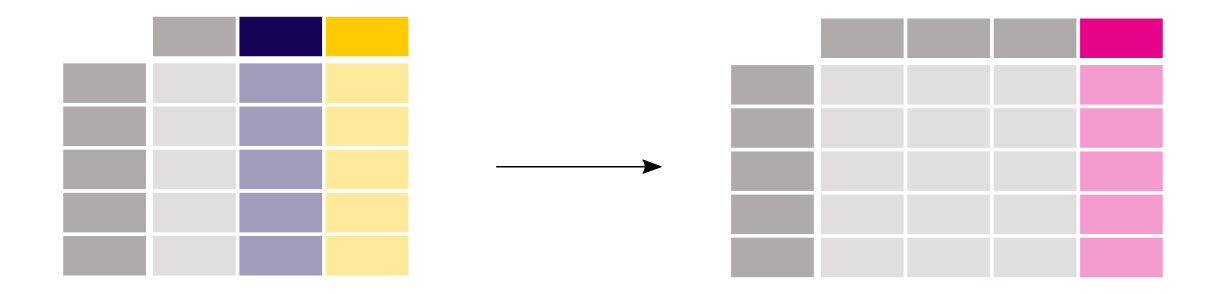

In [ ]:
# Convert NO2 concentration from ug/m3 to ppb;
# 1 ppb = 1.88 ug/m3 at 25 °C, 1 atm)
aq['london_ppb'] = aq['station_london'] / 1.88

Calculations are done ***element-wise***, just like Numpy. (Pandas uses Numpy internally.)

In [ ]:
# Ratio of concentrations in London vs Paris
aq['ratio_london_paris'] = aq['station_london'] / aq['station_paris']
aq.head()

In [ ]:
# A uniform value could also be added
# UK air quality monitoring agency
aq['UK_agency'] = 'DEFRA'
aq.head()

## Resampling

Since pandas understands time, it can do temporal resampling

In [ ]:
# Read NOAA CRN Millbrook 
filename = 'datasets/NOAA-CRN-Millbrook-2017.txt'
millbrook = pd.read_csv(filename, sep=r'\s+', 
                        na_values=[-9999.0, -99.0], 
                        parse_dates=['LST_DATE'])
# Use the date column as the index
millbrook = millbrook.set_index('LST_DATE')
millbrook.head()

In [ ]:
# Monthly resampler object
millbrook.resample('MS')

In [ ]:
# We need to tell the resampler what statistic to use for each time period (mean, max, min, std, median)

# monthly mean
mon_mean = millbrook.resample('MS').mean(numeric_only=True)
mon_mean.head()

In [ ]:
mon_mean[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

### Exercise

Do the following with NOAA CRN data from Millbrook, NY. 

1. Find the conditions on Aug 7, 2017. The mean temperature was 15.8 °C. What was the mean RH? Did it precipitate?
2. Make a boxplot that looks like the following 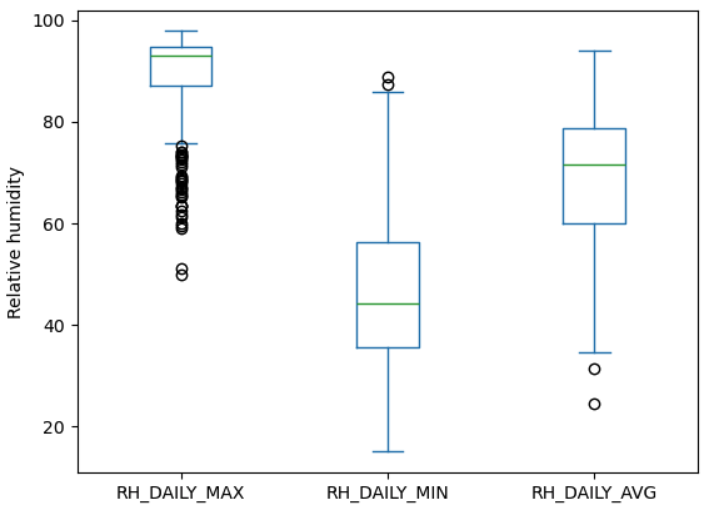
3. Make a scatter plot of precipitation ('P_DAILY_CALC') vs solar radiation ('SOLARAD_DAILY'). Why is there an association between these two variables?
4. Plot or print monthly mean relative humidity ('RH_DAILY_AVG'). Which month had the highest relative humidity in 2017?

In [ ]:
# Re-read NOAA CRN Millbrook 
filename = 'datasets/NOAA-CRN-Millbrook-2017.txt'
millbrook = pd.read_csv(filename, sep=r'\s+', 
                        na_values=[-9999.0, -99.0], 
                        parse_dates=['LST_DATE'])
# Use the date column as the index
millbrook = millbrook.set_index('LST_DATE')

# Write your code here

## Rename columns in a `DataFrame`

Both the column and row/index labels can be renamed. Renaming columns is much more common

In [ ]:
# Use a dictionary to rename some columns
aq_renamed = aq.rename( columns={'station_london':'London',
                                 'station_paris':'Paris',
                                 'station_antwerp':'Antwerp'} )
aq_renamed.head()